<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Futebol_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install pycaret -q

In [25]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [26]:
import pandas as pd

In [27]:
df = pd.read_excel("resultados.xlsx")

In [28]:
data = df.drop(columns=['Confronto', 'Data_new', 'Time', 'Time_Fora','N_Gols'])

In [29]:
test = data.sample(frac=0.30)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [30]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [31]:
clf = setup(data=train, target='Result')

,Description,Value
0,session_id,5621
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(266, 37)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
clf = setup(data = data,
            target = 'Result',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            # remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'football_results_01')

,Description,Value
0,session_id,5463
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(380, 37)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4756,0.5000,0.3333,0.2267,0.3069,0.0000,0.0000,0.011
et,Extra Trees Classifier,0.4613,0.5719,0.3850,0.4016,0.4159,0.0970,0.1002,0.465
knn,K Neighbors Classifier,0.4422,0.5231,0.3499,0.3610,0.3718,0.0407,0.0514,0.140
ridge,Ridge Classifier,0.4420,0.0000,0.3678,0.4065,0.4142,0.0790,0.0824,0.020
rf,Random Forest Classifier,0.4420,0.5900,0.3598,0.3652,0.3858,0.0569,0.0628,0.646
svm,SVM - Linear Kernel,0.4416,0.0000,0.3868,0.4113,0.4205,0.1029,0.1052,0.081
lr,Logistic Regression,0.4269,0.5491,0.3575,0.3937,0.4026,0.0619,0.0631,0.046
gbc,Gradient Boosting Classifier,0.4265,0.5539,0.3557,0.3793,0.3918,0.0544,0.0554,0.923
dt,Decision Tree Classifier,0.4192,0.5453,0.3902,0.4238,0.4122,0.0864,0.0881,0.033
lda,Linear Discriminant Analysis,0.4152,0.5661,0.3594,0.3992,0.4016,0.0583,0.0599,0.017


In [34]:
print(best)

DummyClassifier(constant=None, random_state=5463, strategy='prior')


In [35]:
rf = create_model('rf')
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3333,0.6036,0.2308,0.2167,0.2626,-0.1571,-0.1761
1,0.2963,0.5269,0.2271,0.2521,0.2646,-0.1875,-0.1975
2,0.5926,0.7437,0.4982,0.5741,0.5374,0.2929,0.3304
3,0.4815,0.6180,0.4206,0.3519,0.3974,0.1390,0.1643
4,0.3704,0.4146,0.2778,0.2116,0.2694,-0.0625,-0.0756
5,0.4231,0.6213,0.3849,0.3385,0.3752,0.0802,0.0842
6,0.3846,0.5079,0.3175,0.3590,0.3560,-0.0048,-0.0050
7,0.5385,0.6911,0.4707,0.5260,0.5048,0.1875,0.2058
8,0.5000,0.5082,0.3632,0.3619,0.4170,0.1221,0.1353


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5463, verbose=0,
                       warm_start=False)


In [36]:
tuned_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.5979,0.3297,0.3704,0.3603,0.0074,0.0092
1,0.4074,0.5101,0.3040,0.3157,0.3351,-0.0435,-0.0510
2,0.5185,0.6804,0.4029,0.4185,0.4444,0.1643,0.1841
3,0.5185,0.5926,0.4821,0.5315,0.4769,0.2077,0.2338
4,0.4074,0.4531,0.3056,0.2126,0.2794,-0.0189,-0.0267
5,0.5385,0.6262,0.4683,0.3910,0.4513,0.2277,0.2602
6,0.3846,0.5247,0.2976,0.2892,0.3279,-0.0171,-0.0182
7,0.5385,0.6603,0.4707,0.5260,0.5048,0.1875,0.2058
8,0.4615,0.5367,0.3077,0.2857,0.3529,0.0189,0.0229


In [37]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=5463, verbose=0,
                       warm_start=False)


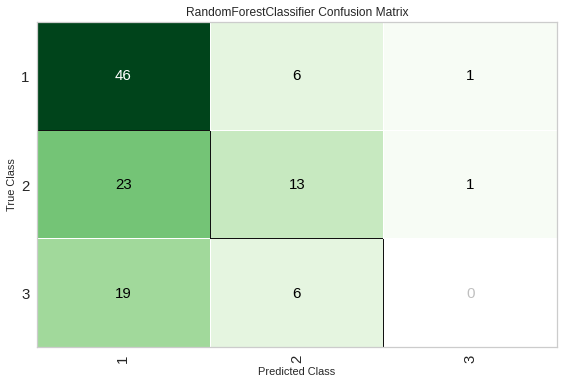

In [38]:
plot_model(tuned_rf, plot='confusion_matrix')

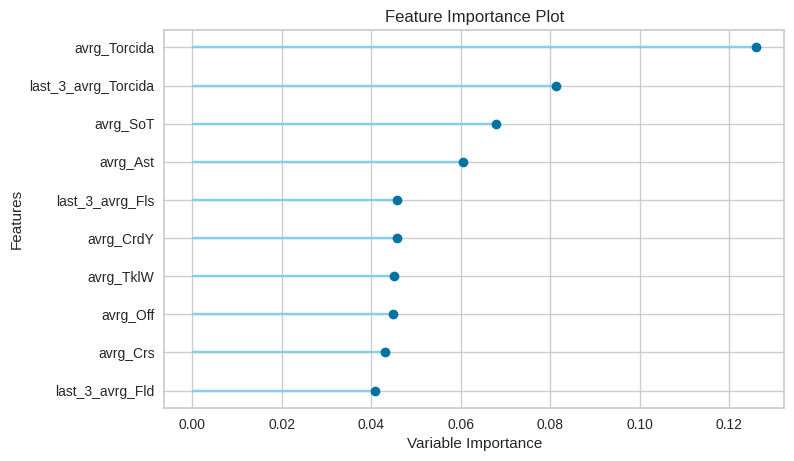

In [39]:
plot_model(tuned_rf, plot='feature')

In [40]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.513,0.646,0.4064,0.4082,0.4356,0.1511,0.1793


IndexError: ignored

In [42]:
final_rf = finalize_model(tuned_rf)

In [43]:
# test_preds = predict_model(final_rf, data=test)
save_model(final_rf,'Modelo_Final_Futebol_2022_04_04')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Unnamed: 0'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Result',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=8, max_features=1.0,
                                         max_leaf_

In [ ]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_Final_Futebol_2022_04_04')